### numpy在深度学习中常用的操作
* 使用pillow 读取图片

In [1]:
import numpy as np
from PIL import Image
im = Image.open('7.png')
print(im.size)


(28, 28)


In [2]:


im_pillow = np.asarray(im)
# print(im_pillow)

print(im_pillow.shape)

(28, 28, 3)


In [3]:
## 取0通道的所有数据
im_pillow_c1 = im_pillow[:, :, 0]
im_pillow_c2 = im_pillow[:, :, 1]
im_pillow_c3 = im_pillow[:, :, 2]
print(im_pillow_c1)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   

In [4]:
zeros = np.zeros((im_pillow.shape[0], im_pillow.shape[1], 1))
zeros.shape


(28, 28, 1)

In [5]:
im_pillow_c1.shape

(28, 28)

In [6]:
zeros.shape

(28, 28, 1)

#### 使用 np.newaxis 让数组增加一个维度
* PyTorch 中的函数名 unsqueeze() 与 numpy 中的函数名 newaxis() 功能相同

In [7]:
im_pillow_c1 = im_pillow_c1[:, :, np.newaxis]
im_pillow_c1.shape

(28, 28, 1)

### 维度扩展
* 使用np.concatenate() 函数进行扩展
* 

In [8]:
# 将矩阵沿着axis=2 方向一起拼接
# 拼接两个zero矩阵
im_pillow_c1_3ch = np.concatenate((im_pillow_c1, zeros, zeros),axis=2)
im_pillow_c1_3ch.shape

(28, 28, 3)

In [9]:
im_pillow_c2_3ch = np.zeros(im_pillow.shape)
print(im_pillow_c2_3ch.shape)
im_pillow_c2_3ch[:,:,1] = im_pillow_c2
print(im_pillow_c2_3ch.shape)
# print(im_pillow_c2_3ch)

im_pillow_c3_3ch = np.zeros(im_pillow.shape)
im_pillow_c3_3ch[:,:,2] = im_pillow_c3
print(im_pillow_c3_3ch.shape)
print(im_pillow_c3_3ch)

(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
[[[  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]
  ...
  [  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]]

 [[  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]
  ...
  [  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]]

 [[  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]
  ...
  [  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]]

 ...

 [[  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]
  ...
  [  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]]

 [[  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]
  ...
  [  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]]

 [[  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]
  ...
  [  0.   0. 255.]
  [  0.   0. 255.]
  [  0.   0. 255.]]]


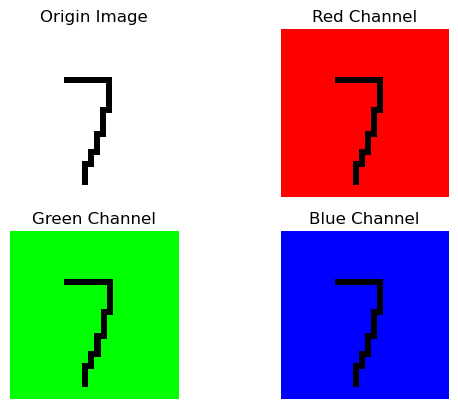

In [10]:
from matplotlib import pyplot as plt
plt.subplot(2, 2, 1)
plt.title('Origin Image')
plt.imshow(im_pillow)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(im_pillow_c1_3ch.astype(np.uint8))
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(im_pillow_c2_3ch.astype(np.uint8))
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(im_pillow_c3_3ch.astype(np.uint8))
plt.axis('off')
plt.savefig('./rgb_pillow.png', dpi=150)

### numpy数组的深浅拷贝
* 浅拷贝或称视图，指的是与原数组共享数据的数组
* 深拷贝又称副本，也就是完全复制原有数组，创建一个新的数组，修改新的数组不会影响原数组。
* np.array() 属于深拷贝，np.asarray() 则是浅拷贝。
* view()是浅拷贝，copy()是深拷贝

In [11]:
a = np.arange(6)
print(a.shape)
print(a)
# 使用浅拷贝会影响原有被拷贝数组
b = a.view()
print(b.shape)
b.shape = 2, 3
print(b)
b[0,0] = 111
print(a)
print(b)
c = a.copy()
c.shape = 2, 3
c[0,0] = 115
print(a)
print(c)
print(a.shape)
print(c.shape)

(6,)
[0 1 2 3 4 5]
(6,)
[[0 1 2]
 [3 4 5]]
[111   1   2   3   4   5]
[[111   1   2]
 [  3   4   5]]
[111   1   2   3   4   5]
[[115   1   2]
 [  3   4   5]]
(6,)
(2, 3)


In [12]:
# 使用深拷贝
im_pillow = np.array(im)
# 行列以及1通道（包含）之后的通道都置为0
im_pillow[:,:,1:]=0
print(im_pillow)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


### 统计概率时用的方法

In [13]:
probs = np.array([0.075, 0.15, 0.075, 0.15, 0.0, 0.05, 0.05, 0.2, 0.25])

In [14]:
#求最大值索引
maxIndex = np.argmax(probs)
print(maxIndex)

8


In [15]:
# np.argsort()排序后的原始索引
probs_idx_sort = np.argsort(-probs)  #注意，加了负号，是按降序排序
print(probs_idx_sort)
#概率最大的前三个值的坐标
print(probs_idx_sort[:3])

[8 7 1 3 0 2 5 6 4]
[8 7 1]


#### display函数
* IPython.display模块中的display函数，用于输出富文本格式的信息，比如HTML、图片等，而不仅仅是纯文本。这对于创建交互式文档非常有用。

In [16]:
import pandas as pd
from IPython.display import display

data = {'Name': ['Tom', 'Nick', 'John'], 'Age': [20, 21, 19]}
df = pd.DataFrame(data)

display(df)

,Name,Age
0,Tom,20
1,Nick,21
2,John,19
